<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/Rain_Prediction_using_Fuzzy_Logic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

nhietdo = ctrl.Antecedent(np.arange(0,3,0.1), 'nhietdo')
tocdogio = ctrl.Antecedent(np.arange(0,3,0.1), 'tocdogio')
luongmua = ctrl.Antecedent(np.arange(0,4,0.1), 'luongmua')



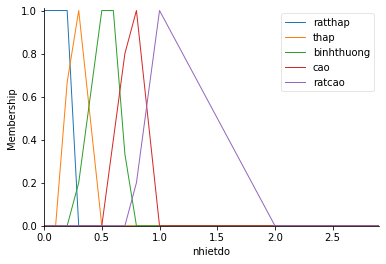

In [171]:
nhietdo['ratthap'] = fuzz.trapmf(nhietdo.universe, [0,0,0.2,0.25])
nhietdo['thap'] = fuzz.trapmf(nhietdo.universe, [0.1,0.25,0.3,0.5])
nhietdo['binhthuong'] = fuzz.trapmf(nhietdo.universe, [0.25,0.5,0.6,0.75])
nhietdo['cao'] = fuzz.trapmf(nhietdo.universe, [0.5,0.75,0.8,1])
nhietdo['ratcao'] = fuzz.trapmf(nhietdo.universe, [0.75,1,1,2])

nhietdo.view()






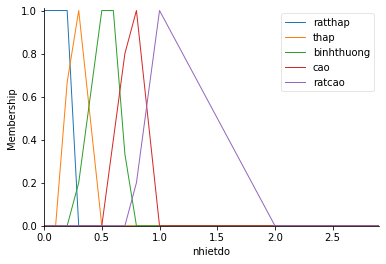

In [172]:
tocdogio['ratthap'] = fuzz.trapmf(tocdogio.universe, [0,0,0.1,0.25])
tocdogio['thap'] = fuzz.trapmf(tocdogio.universe, [0.1,0.25,0.25,0.5])
tocdogio['binhthuong'] = fuzz.trapmf(tocdogio.universe, [0.25,0.5,0.5,0.75])
tocdogio['cao'] = fuzz.trapmf(tocdogio.universe, [0.5,0.75,0.75,1])
tocdogio['ratcao'] = fuzz.trapmf(tocdogio.universe, [0.75,1,1,2])

nhietdo.view()

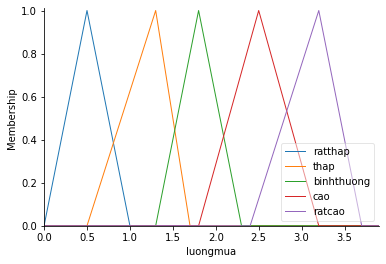

In [173]:
luongmua['ratthap'] = fuzz.trimf(luongmua.universe, [0,0.5,1])
luongmua['thap'] = fuzz.trimf(luongmua.universe, [0.5,1.3,1.7])
luongmua['binhthuong'] = fuzz.trimf(luongmua.universe, [1.3,1.8,2.3])
luongmua['cao'] = fuzz.trimf(luongmua.universe, [1.8,2.5,3.2])
luongmua['ratcao'] = fuzz.trimf(luongmua.universe, [2.4,3.2,3.7])

luongmua.view()

In [184]:
rule1 = ctrl.Rule(nhietdo['ratthap']&tocdogio['ratthap'],luongmua['ratthap'])
rule2 = ctrl.Rule(nhietdo['ratthap']&tocdogio['thap'],luongmua['ratthap'])
rule3 = ctrl.Rule(nhietdo['ratthap']&tocdogio['binhthuong'],luongmua['thap'])
rule4 = ctrl.Rule(nhietdo['ratthap']&tocdogio['cao'],luongmua['thap'])
rule5 = ctrl.Rule(nhietdo['ratthap']&tocdogio['ratcao'],luongmua['binhthuong'])

rule6 = ctrl.Rule(nhietdo['thap']&tocdogio['ratthap'],luongmua['ratthap'])
rule7 = ctrl.Rule(nhietdo['thap']&tocdogio['thap'],luongmua['ratthap'])
rule8 = ctrl.Rule(nhietdo['thap']&tocdogio['binhthuong'],luongmua['thap'])
rule9 = ctrl.Rule(nhietdo['thap']&tocdogio['cao'],luongmua['binhthuong'])
rule10 = ctrl.Rule(nhietdo['thap']&tocdogio['ratcao'],luongmua['binhthuong'])


rule11 = ctrl.Rule(nhietdo['binhthuong']&tocdogio['ratthap'],luongmua['thap'])
rule12 = ctrl.Rule(nhietdo['binhthuong']&tocdogio['thap'],luongmua['thap'])
rule13 = ctrl.Rule(nhietdo['binhthuong']&tocdogio['binhthuong'],luongmua['binhthuong'])
rule14 = ctrl.Rule(nhietdo['binhthuong']&tocdogio['cao'],luongmua['binhthuong'])
rule15 = ctrl.Rule(nhietdo['binhthuong']&tocdogio['ratcao'],luongmua['cao'])

rule16 = ctrl.Rule(nhietdo['cao']&tocdogio['ratthap'],luongmua['thap'])
rule17 = ctrl.Rule(nhietdo['cao']&tocdogio['thap'],luongmua['binhthuong'])
rule18 = ctrl.Rule(nhietdo['cao']&tocdogio['binhthuong'],luongmua['binhthuong'])
rule19 = ctrl.Rule(nhietdo['cao']&tocdogio['cao'],luongmua['cao'])
rule20 = ctrl.Rule(nhietdo['cao']&tocdogio['ratcao'],luongmua['cao'])

rule21 = ctrl.Rule(nhietdo['ratcao']&tocdogio['ratthap'],luongmua['binhthuong'])
rule22 = ctrl.Rule(nhietdo['ratcao']&tocdogio['thap'],luongmua['binhthuong'])
rule23 = ctrl.Rule(nhietdo['ratcao']&tocdogio['binhthuong'],luongmua['cao'])
rule24 = ctrl.Rule(nhietdo['ratcao']&tocdogio['cao'],luongmua['cao'])
rule25 = ctrl.Rule(nhietdo['ratcao']&tocdogio['ratcao'],luongmua['ratcao'])









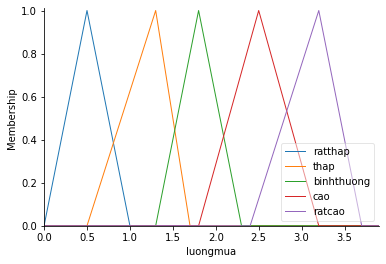

In [186]:
ketluan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
ketluan = ctrl.ControlSystemSimulation(ketluan_ctrl)

ketluan.input['nhietdo'] = 0.3
ketluan.input['tocdogio'] = 0.3

ketluan.compute





luongmua.view(sim=ketluan)





